------------------------------------

## 4. Command Line Question

Here is another command line question to enjoy. We previously stated that using the command line tools is a skill that Data Scientists must master.

In this question, you should use any command line tool that you know to answer the following questions using the same dataset that you have been using so far:
  + What is the most-watched Netflix title?
  + Report the average time between subsequent clicks on Netflix.com
  + Provide the ID of the user that has spent the most time on Netflix
    
__Important note:__ You may work on this question in any environment (AWS, your PC command line, Jupyter notebook, etc.), but the final script must be placed in CommandLine.sh, which must be executable. Please run the script and include a __screenshot__ of the <ins>output</ins> in the notebook for evaluation.  

### To execute the CommandLine.sh script from the notebook use the following command in a cell

In [1]:
# Run the CommandLine.sh script
!bash CommandLine.sh

Most-watched Netflix title:
Black Mirror: Bandersnatch
Average time between subsequent clicks:
33476.1
User ID that spent the most time on Netflix:
322abe045c


Screenshot of the output of the CommandLine.sh in the Git Bash terminal, saved in the file "SS.png"

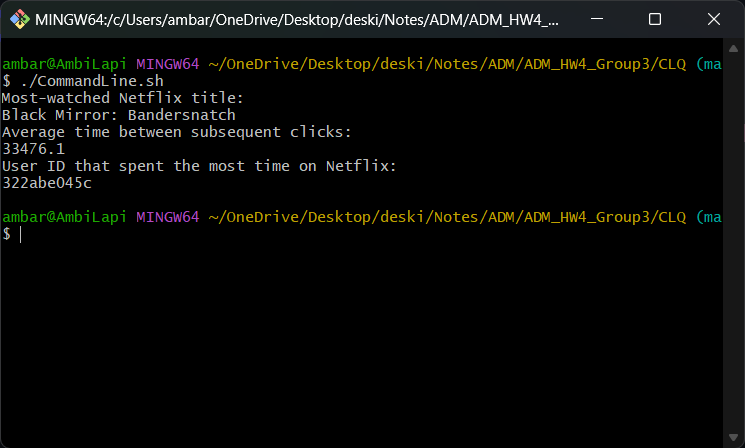

--------------------------------

## 5. Algorithmic Question 

Federico studies in a demanding university where he has to take a certain number $N$ of exams to graduate,  but he is free to choose in which order he will take these exams. Federico is panicking since this university is not only one of the toughest in the world but also one of the weirdest. His final grade won't depend at all on the mark he gets in these courses: there's a precise evaluation system. 

He was given an initial personal score of $S$ when he enrolled, which changes every time he takes an exam: now comes the crazy part.
He soon discovered that every of the $N$ exams he has to take is assigned a mark $p$. Once he has chosen an exam, his score becomes equal to the mark $p$, and at the same time, the scoring system changes:
+ If he takes an "easy" exam (the score of the exam being less than his score), every other exam's mark is increased by the quantity $S - p$.
+ If he takes a "hard" exam (the score of the exam is greater than his score), every other exam's mark is decreased by the quantity $p - S$.
  
So, for example, consider $S=8$ as the initial personal score. Federico must decide which exam he wants to take, being $[5,7,1]$ the marks list. If he takes the first one, being $5 < 8$ and $8 - 5 = 3$, the remaining list now becomes $[10,4]$, and his score is updated as $S = 5$.

In this chaotic university where the only real exam seems to be choosing the best way to take exams, you are the poor student advisor who is facing a long queue of confused people who need some help. Federico is next in line,  and he comes up in turn with an inescapable question: he wants to know which is the highest score possible he could get. 

a) Fortunately, you have a computer app designed by a brilliant student. Federico wants you to show him the code which this app is based on
because he wants to do paid counseling for other desperate students: in a *recursive* fashion, the helped helps the helpable.

b) Federico is getting angry because he claims that your code is slow! Show him formally with a big-O notation that he is as crazy as this university! 

c) If, unfortunately, Federico is right in the grip of madness, he will threaten you to optimize the code through a different approach. 
You should end this theater of the absurd by any means! (And again, formally prove that you improved time complexity)

d) Ask chatGPT for a third (optimized) implementation and analyze again its time complexity. Be careful (and crafty) in defining the prompt, and challenge the machine in this coding question!

Here are some input/output examples (the first value is the initial personal score, and the second line contains the list of marks): 

__Input 1__
```
8
5 7 1 
```

__Output 1__
```
11
```

__Input 2__
```
25
18 24 21 32 27
```

__Output 2__
```
44
```

__Input 3__
```
30
13 27 41 59 28 33 39 19 52 48 55 79
```

__Output 3__
```
109
```


---------------

### a) Recursive Solution

In [2]:
def max_final_score(S, exams): 
    # Base case: no exams left
    if not exams: 
        # Return the final score
        return S 

    # Initialize the maximum score
    max_score = 0 
    # Iterate over the exams
    for i, p in enumerate(exams): 
        # Copy the list to avoid modifying the original
        next_exams = exams[:i] + exams[i+1:] 
        # Check if the score is less than the threshold
        if p < S: 
            # Increase the marks of remaining exams
            next_exams = [x + (S - p) for x in next_exams] 
        # Check if the score is greater than the threshold
        else: 
            # Decrease the marks of remaining exams
            next_exams = [x - (p - S) for x in next_exams]
        
        # Recursive call for the next exams
        final_score = max_final_score(p, next_exams)
        # Update the maximum score
        max_score = max(max_score, final_score)

    # Return the maximum score
    return max_score 

In [3]:
# Input
S = int(input()) # Initial score of the student
exams = list(map(int, input().split())) # Scores of the exams

# Output
print(max_final_score(S, exams)) # Maximum final score that can be achieved

44


__Input__
```
25
18 24 21 32 27
```

__Output__
```
44
```

---------------

### b) Time Complexity Analysis

The recursive solution explores all permutations of the exams since it considers every possible exam at each step. The number of operations can thus be represented as:

- At the first level, we have $N$ choices (where $N$ is the total number of exams).
- At the second level, we have $N-1$ choices for each of the $N$ scenarios.
- This pattern continues until we reach the last exam, where we have only 1 choice.

This can be expressed as $N!$ (factorial), which is the product of all positive integers up to $N$:

$$ T(N) = N \cdot (N-1) \cdot (N-2) \cdot \ldots \cdot 2 \cdot 1 = N! $$

Hence, the time complexity for the recursive solution is $O(N!)$.

--------------

### c) Optimization

In [4]:
def max_final_score_memo(S, exams, memo):
    # Base case: no exams left
    if not exams:
        # Return the final score
        return S

    # Check if the current set of exams is already stored in the memo
    if tuple(exams) in memo:
        # Return the stored maximum final score
        return memo[tuple(exams)]

    # Initialize the maximum score
    max_score = 0
    # Iterate over the exams
    for i, p in enumerate(exams):
        # Copy the list to avoid modifying the original
        next_exams = exams[:i] + exams[i+1:]

        # Check if the score is less than the threshold
        if p < S:
            #  Increase the marks of remaining exams
            next_exams = [x + (S - p) for x in next_exams]
        # Check if the score is greater than the threshold
        else:
            # Decrease the marks of remaining exams
            next_exams = [x - (p - S) for x in next_exams]
        
        # Recursive call for the next exams
        # Pass the memo to avoid recalculation of the same set of exams
        final_score = max_final_score_memo(p, next_exams, memo)
        # Update the maximum score
        max_score = max(max_score, final_score)

    # Store the maximum final score in the memo
    memo[tuple(exams)] = max_score

    # Return the maximum score
    return max_score

In [5]:
# Input
memo = {} # Memo to store the maximum final score for a set of exams
S = int(input()) # Initial score of the student
exams = list(map(int, input().split())) # Scores of the exams

# Output
print(max_final_score_memo(S, exams, memo)) # Maximum final score that can be achieved

44


__Input__
```
25
18 24 21 32 27
```

__Output__
```
44
```

#### Time Complexity Analysis of Optimization

The memoized version reduces the number of calculations by storing the results of subproblems. Thus, each unique set of exams only needs to be calculated once. However, in the worst case, we still need to calculate the score for every possible subset of exams, which can be represented by the powerset of exams. The size of the powerset of a set with $N$ elements is $2^N$.

But due to the nature of score adjustment, some of the subsets are not independent (since the scores of the remaining exams change based on the current score S), so we cannot directly apply the powerset argument.

Instead, we consider the number of operations for generating each new subset and the number of choices we have at each step. For each choice of exam, we calculate the new scores for the remaining exams, which is an $O(N)$ operation. We do this for each of the $N$ exams, leading to $O(N^2)$ operations for each set of choices.

However, because of memoization, we do not recompute the scores for the same set of remaining exams. Therefore, the total number of operations is bounded by the number of unique subsets we can form, which is less than or equal to the number of permutations, as the order of exams matters in our scenario. Hence, we get a time complexity that is better than $O(N!)$ but not as good as $O(2^N)$.

We can argue that the time complexity is approximately $O(N^2)$, considering that the number of unique subsets we need to compute due to the changing scores is significantly less than the total number of permutations.

-------------------

### d) Third Implementation

#### 1) Iterative Dynamic Programming Approach

An iterative approach can be faster than a recursive approach due to overheads associated with function calls and stack usage in recursion. However, the given problem involves a complex state transition that depends on the ordering of exams, which doesn't easily translate into a typical bottom-up dynamic programming approach.

The primary difficulty lies in the fact that the impact of taking an exam on the remaining exams is not independent of the exams themselves – it's a function of the difference between scores. This interdependency between exams makes a traditional iterative DP approach challenging to formulate.

However, if we could find a way to represent the state of the exams after each choice in a manner that allows us to iteratively build up to the final solution, we could attempt an iterative DP solution. Unfortunately, given the complexity of the state transition, an iterative DP solution is not straightforward and may not be possible without significantly transforming the problem.

Given this complexity, and without a concrete iterative DP solution, I'll move on to providing a heuristic approach.

#### 2) Heuristic or Approximate Solution

Heuristic approaches aim to find a good enough solution within a reasonable timeframe, especially when the optimal solution is computationally infeasible for large inputs. For Federico's problem, one simple heuristic might be to always choose the exam that minimizes the maximum change to other exams' scores.

Here's a simple heuristic in Python:

In [6]:
def heuristic_max_score(S, exams):
    exams = sorted(exams)
    while exams:
        # Find the exam that is closest to the current score S
        closest_exam = min(exams, key=lambda p: abs(S - p))
        exams.remove(closest_exam)
        if closest_exam < S:
            S = closest_exam
            exams = [x + (S - closest_exam) for x in exams]
        elif closest_exam > S:
            S = closest_exam
            exams = [x - (closest_exam - S) for x in exams]
    return S

In [7]:
# Input
S = int(input()) # Initial score of the student
exams = list(map(int, input().split())) # Scores of the exams

# Output
print(heuristic_max_score(S, exams)) # Maximum final score that can be achieved

32


__Input__
```
25
18 24 21 32 27
```

__Output__
```
32
```

This heuristic solution simply tries to minimize the impact on the score of the remaining exams by always choosing the exam score that's closest to the current score `S`. However, this does not guarantee an optimal solution, as sometimes taking an exam with a larger difference early on could lead to a better configuration of scores for subsequent exams.

##### Time Complexity Analysis of Heuristic Approach

In the heuristic approach, we perform the following operations:

1. Sort the exams initially, which takes $O(N \log N)$ time.
2. Iterate through the exams, which takes $O(N)$ time.
3. For each exam, we find the closest exam, which, if implemented as a linear search, takes $O(N)$ time.
4. We then adjust the scores of the remaining exams, which also takes $O(N)$ time per exam.

The most expensive operation is finding the closest exam for each of the $N$ exams, resulting in $O(N^2)$ time.

Therefore, the time complexity of the heuristic approach is dominated by the $O(N^2)$ complexity due to steps 3 and 4, even though the initial sorting adds $O(N \log N)$ complexity. Thus, we can express the overall time complexity as $O(N^2)$.

---------------------